In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C']})

#https://www.python-graph-gallery.com/321-custom-networkx-graph-appearance

# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to')

# Simple Plot it
# nx.draw(G, with_labels=True)

# Graph with Custom nodes:
# nx.draw(G, with_labels=True, node_size=1500, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=40)

# Custom the labels:
#nx.draw(G, with_labels=True, node_size=1500, font_size=25, font_color="yellow", font_weight="bold")

# Chart with Custom edges [assing width, edge_color and style parameters to the function.]
# nx.draw(G, with_labels=True, width=5, edge_color="skyblue", style="solid")

# All together we can do something fancy
# nx.draw(G, with_labels=True, node_size=1500, node_color="skyblue", node_shape="o", alpha=0.5, linewidths=4, font_size=25, 
#         font_color="grey", font_weight="bold", width=2, edge_color="grey")
# plt.show()

In [13]:
# control layout
# # Build a dataframe with your connections
# df = pd.DataFrame({ 'from':['A', 'B', 'C','A','E','F','E','G','G','D','F'], 'to':['D', 'A', 'E','C','A','F','G','D','B','G','C']})

# # Build your graph
# G=nx.from_pandas_edgelist(df, 'from', 'to')
 
# # Fruchterman Reingold
# nx.draw(G, with_labels=True, node_size=1500, node_color="skyblue", pos=nx.fruchterman_reingold_layout(G))
# plt.title("fruchterman_reingold")
# plt.show()
 
# # Circular
# nx.draw(G, with_labels=True, node_size=1500, node_color="skyblue", pos=nx.circular_layout(G))
# plt.title("circular")
# plt.show()
 
# # Random
# nx.draw(G, with_labels=True, node_size=1500, node_color="skyblue", pos=nx.random_layout(G))
# plt.title("random")
# plt.show()
 
# # Spectral
# nx.draw(G, with_labels=True, node_size=1500, node_color="skyblue", pos=nx.spectral_layout(G))
# plt.title("spectral")
# plt.show()
 
# # Spring
# nx.draw(G, with_labels=True, node_size=1500, node_color="skyblue", pos=nx.spring_layout(G))
# plt.title("spring")
# plt.show()

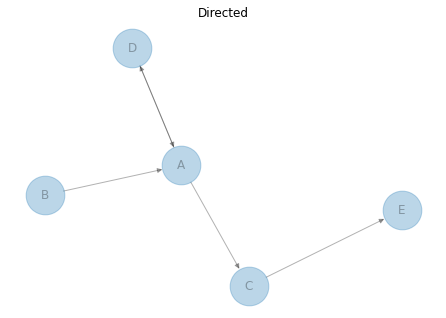

In [16]:
# Directed or Undirected Network
 
# Build a dataframe with your connections
# This time a pair can appear 2 times, in one side or in the other!
df = pd.DataFrame({ 'from':['D', 'A', 'B', 'C','A'], 'to':['A', 'D', 'A', 'E','C']})

# ------- DIRECTED
 
# Build your graph. Note that we use the DiGraph function to create the graph!
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph() )
 
# Make the graph
nx.draw(G, with_labels=True, node_size=1500, alpha=0.3, arrows=True)
plt.title("Directed");plt.show()

# ------- UNDIRECTED
 
# Build your graph. Note that we use the Graph function to create the graph!
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )
 
# Make the graph
nx.draw(G, with_labels=True, node_size=1500, alpha=0.3, arrows=True)
plt.title("UN-Directed");plt.show()

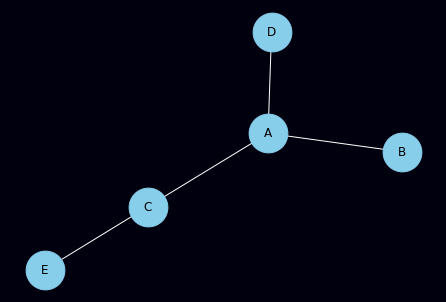

In [18]:
# Background Color of Network Chart

# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )
 
# Custom the nodes:
fig = plt.figure()
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_color='white')
fig.set_facecolor("#00000F")
 
# If you want to save the figure to png:
# plt.savefig('yourname.png', facecolor=fig.get_facecolor() )

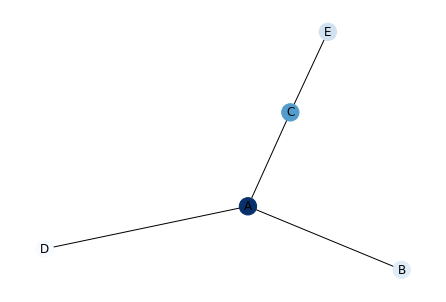

In [25]:
## Map a color to network nodes { Add Characterstics }

# Option 1 :  Assign Numerical Values  {Continuous Color Scale (left)}
# Build a dataframe with your connections
df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C']})
 
# And a data frame with characteristics for your nodes
carac = pd.DataFrame({ 'ID':['A', 'B', 'C','D','E'], 'myvalue':['123','25','76','12','34'] })
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )
 
# The order of the node for networkX is the following order:
G.nodes()
# NodeView(('A', 'D', 'B', 'C', 'E'))

# Thus, we cannot give directly the 'myvalue' column to netowrkX, we need to arrange the order!
 
# Here is the tricky part: I need to reorder carac, to assign the good color to each node
carac= carac.set_index('ID')
carac=carac.reindex(G.nodes())
 
# Plot it, providing a continuous color scale with cmap:
nx.draw(G, with_labels=True, node_color=carac['myvalue'].astype(int), cmap=plt.cm.Blues)
plt.show()

## Option 2  {Categorical Color Scale (right) }
##     A and B belongs to the same group, D and E are grouped together and C is alone in his group. We used a categorical color scale.

# And a data frame with characteristics for your nodes
carac = pd.DataFrame({ 'ID':['A', 'B', 'C','D','E'], 'myvalue':['group1','group1','group2','group3','group3'] })
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )
 
# The order of the node for networkX is the following order:
G.nodes()
# Thus, we cannot give directly the 'myvalue' column to netowrkX, we need to arrange the order!
 
# Here is the tricky part: I need to reorder carac to assign the good color to each node
carac= carac.set_index('ID')
carac=carac.reindex(G.nodes())
 
# # And I need to transform my categorical column in a numerical value: group1->1, group2->2...
carac['myvalue']=pd.Categorical(carac['myvalue'])
carac['myvalue'].cat.codes
 
# # Custom the nodes:
nx.draw(G, with_labels=True, node_color=carac['myvalue'].cat.codes, cmap=plt.cm.Set1, node_size=1500)

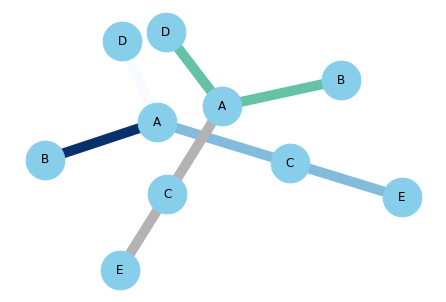

In [35]:
## Map Color to the Edge { High , Medium, Low Impact}

## Numeric value option

df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C'], 'value':[1, 10, 5, 5]})

# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )
 
# Custom the nodes:
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_color=df['value'], width=10.0, edge_cmap=plt.cm.Blues)


## OPTION 2: Categorical approach
# Build a dataframe with your connections
df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C'], 'value':['typeA', 'typeA', 'typeB', 'typeB']})
 
# And I need to transform my categorical column in a numerical value typeA->1, typeB->2...
df['value']=pd.Categorical(df['value'])
df['value'].cat.codes
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )
 
# Custom the nodes:
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_color=df['value'].cat.codes, width=10.0, edge_cmap=plt.cm.Set2)

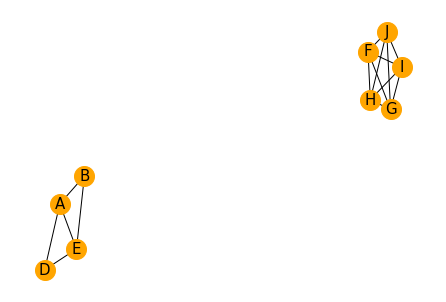

In [40]:
##Network Chart from Correlation Matrix  {Close vs distant}

# https://www.python-graph-gallery.com/327-network-from-correlation-matrix


# I build a data set: 10 individuals and 5 variables for each
ind1=[5,10,3,4,8,10,12,1,9,4]
ind5=[1,1,13,4,18,5,2,11,3,8]
# df = pd.DataFrame({ 'A':ind1, 'B':ind1 + np.random.randint(10, size=(10)) , 'C':ind1 + np.random.randint(10, size=(10)) , 'D':ind1 + np.random.randint(5, size=(10)) , 'E':ind1 + np.random.randint(5, size=(10)), 'F':ind5, 'G':ind5 + np.random.randint(5, size=(10)) , 'H':ind5 + np.random.randint(5, size=(10)), 'I':ind5 + np.random.randint(5, size=(10)), 'J':ind5 + np.random.randint(5, size=(10))})
 
# Calculate the correlation between individuals. We have to transpose first, because the corr function calculate the pairwise correlations between columns.
corr = df.corr()
 
# # Transform it in a links data frame (3 columns only):
links = corr.stack().reset_index()
links.columns = ['var1', 'var2', 'value']
 
# # Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['value'] > 0.8) & (links['var1'] != links['var2']) ]
 
# # Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 
# # Plot the network:
nx.draw(G, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)



In [37]:
df

,A,B,C,D,E,F,G,H,I,J
0,5,9,8,5,6,1,2,2,2,2
1,10,11,10,11,13,1,2,1,3,3
2,3,8,6,4,3,13,17,16,14,15
3,4,12,8,4,7,4,4,8,8,7
4,8,13,16,8,8,18,22,19,18,18
5,10,14,16,14,14,5,6,7,6,7
6,12,18,14,16,15,2,4,3,3,6
7,1,1,10,5,2,11,13,15,12,11
8,9,17,16,12,12,3,4,5,5,6
9,4,4,6,6,6,8,11,9,10,11
